In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

np.random.seed(42)

In [3]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

In [4]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

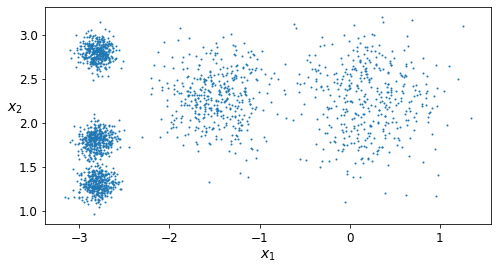

In [5]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [6]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)
kmeans.score(X)

-211.59853725816856

In [7]:
#Na mão
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_samples

euclideanDistances = pairwise_distances(X, metric='manhattan') #matriz de distâncias
#silhouette samples com a matriz de distâncias
silhouette_from_euclideanDistances = silhouette_samples(euclideanDistances, y_pred, metric='precomputed')
silhouette_from_euclideanDistances[:10]

array([0.77153578, 0.81049298, 0.30152477, 0.78634798, 0.59787097,
       0.61949441, 0.82054085, 0.72154112, 0.59513596, 0.80760988])

In [8]:
#passa as instâncias como parâmetro e calcula a matriz de distâncias automaticamente
silhouette_straight = silhouette_samples(X, y_pred, metric='manhattan')
silhouette_straight[:10]

array([0.77153578, 0.81049298, 0.30152477, 0.78634798, 0.59787097,
       0.61949441, 0.82054085, 0.72154112, 0.59513596, 0.80760988])

In [9]:
#função para verificar que a saída dos dois metodos são os mesmos
def equal_array(a, b):
    i = 0
    for x, y in zip(a, b):
        if x == y:
            i += 1
    if i == len(a):
        return True

print(equal_array(silhouette_straight, silhouette_from_euclideanDistances))

True
